In [1]:
library(lmtest)
library(nlme)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




# Часть 1

In [2]:
generate_regression <- function(x, a, b, lambda){
    
    y <- rep(1,length(x))
    sigma <- rep(1,length(x))
    
    for (i in 2:length(x)){
        sigma[i] <- lambda * sigma[i-1] +  rnorm(1, mean = 0, sd = 1)
    }
    
    for (i in 1:length(x)){
        y[i] <- a + b * x[i] + sigma[i]
    }

    return ( y )
}


# generate_regression_ar1 <- function(x, a, b, lambda) {
#   n <- length(x)
#   epsilon <- rep(0, n)
  
#   for (i in 2:n) {
#     epsilon[i] <- lambda * epsilon[i - 1] + rnorm(1, mean = 0, sd = 1)
#   }

#   y <- a + b * x + epsilon

#   return(list(y = y, epsilon = epsilon))
# }

## Генерация выборки с корреляцией

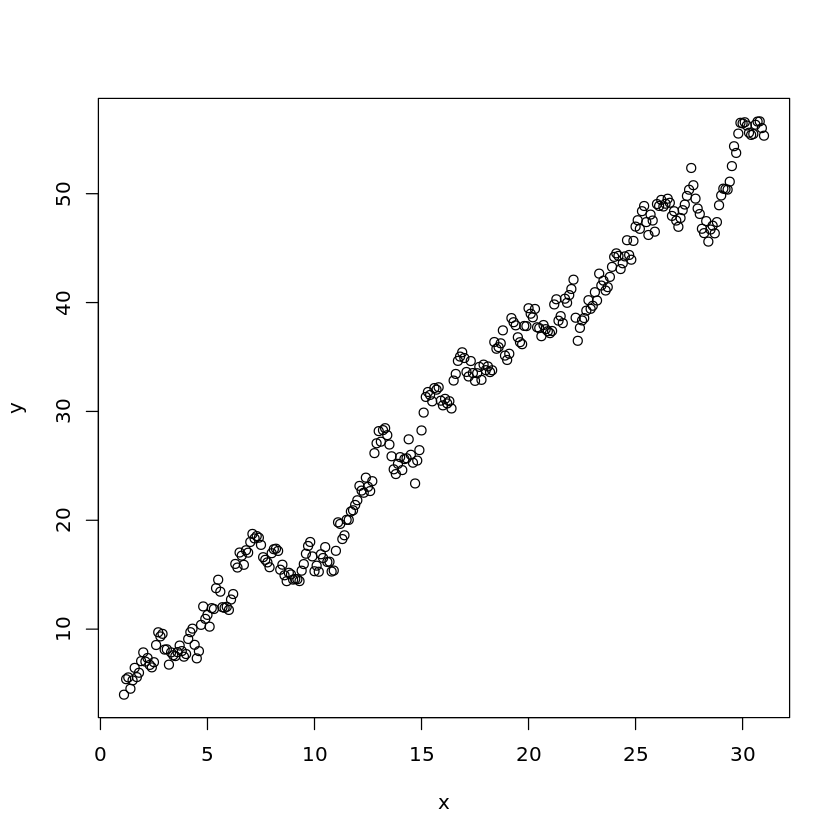

In [3]:
n <- 300
i <- 1:n
x <- 1 + 0.1 * i
y <- generate_regression(x, 1, 1.8, .9)
plot(x, y, type = "p") 

### тест Дарбина-Уотсона 

In [4]:
residuals <- lm(y~x)$residuals

n <- length(residuals)
sum_squared_diff <- sum(diff(residuals)^2)
sum_squared_residuals <- sum(residuals^2)
durbin_watson_statistic <- sum_squared_diff / sum_squared_residuals
durbin_watson_statistic

[1] 0.2501572

Проверю значение библиотечным тестом

In [5]:
dwtest(lm(y~x))


	Durbin-Watson test

data:  lm(y ~ x)
DW = 0.25016, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


### ДОМНК 

In [ ]:
G <- diag(1,n)

# for (i in 1:n)
# {
#   for(j in 1:n)
#     G[i,j] <- .2^abs(i - j)
# }

X <- cbind(1, x)
teta <- solve(t(X)  %*% solve(G) %*% X) %*% t(X) %*% solve(G) %*% y
teta

# y_pred <- X %*% teta
# residuals <- y - y_pred

,2.509218
x,1.707500


**Вроде все правильно**

In [ ]:
gls(y ~ x, correlation = corAR1())

## Гетероскедастичность

In [ ]:
e <- x*rnorm(n,0,.2)
y <- 5+3*x+e
plot(y~x)

In [ ]:
model <- summary(lm(y~x))

In [ ]:
gqtest(model)

### ОМНК

In [ ]:
G <- diag(c(x^2),n)



x0 = rep(1,n)
Y = matrix(c(y),n,1)
X = matrix(c(x0,x),n,2)



teta <- solve(t(X)%*%solve(G)%*%X)%*%t(X)%*%solve(G)%*%Y
teta
     


# Часть 2

In [ ]:
data <- read.table(file = "../Data/flats_1.txt", header = TRUE)
# data
model <- lm(Rent ~ M2, data = data)
plot(data$M2  , data$Rent)
summary(model)

In [ ]:
data <- data[-which(data$M2 == 3.0),]
# max(data$Rent)
# data <- data[-which(data$Rent == 25000),]
plot(data$M2  , data$Rent)

In [ ]:
model <- lm(Rent ~ M2, data = data)
shapiro.test(model$residuals)

In [ ]:
gqtest(model)

In [ ]:
dwtest(model)

Присутствует **гетероскедастичность**

In [ ]:

# y = data$Price / data$M2
# x = 1/data$M2

In [ ]:
model2 <- lm( (Rent / M2) ~ (1/M2) ,data = data)
summary(model2)

In [ ]:
shapiro.test(model2$residuals)

In [ ]:
gqtest(model2)